# Question 1

In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

# Define the stock symbol and download historical data
stock_symbol = "LAND.L"
start_date = "2022-01-12"
end_date = "2023-01-12"

# Download historical data
df = yf.download(stock_symbol, start=start_date, end=end_date)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-12,770.000000,775.200012,763.000000,774.000000,686.693237,2127547
2022-01-13,769.799988,779.599976,769.000000,777.799988,690.064636,2903856
2022-01-14,776.400024,789.799988,770.562988,787.799988,698.936646,2479619
2022-01-17,790.799988,818.200012,788.400024,813.000000,721.294250,2634764
2022-01-18,809.799988,822.400024,803.400024,813.200012,721.471619,4398205


Text(0.5, 1.0, 'Closing Price')

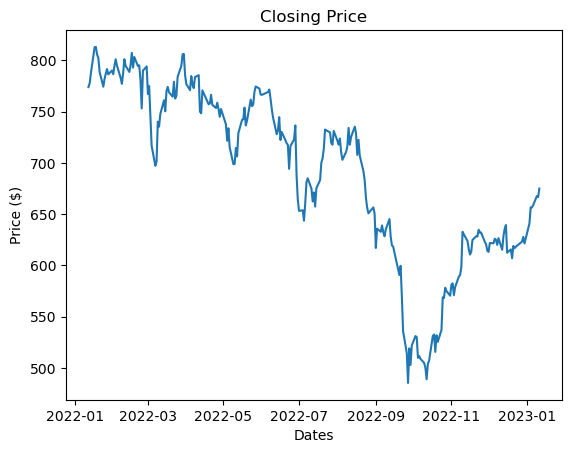

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(df['Close']) #choosing the series you want to plot
plt.xlabel('Dates')
plt.ylabel('Price ($)')
plt.title('Closing Price')

In [8]:
import numpy as np
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.0049096142828116305,
 0.01285678009209077,
 0.03198802799104178,
 0.0002459026450611943,
 -0.009345894803398577]

In [9]:
#Changing the list variable to numpy array:
normal_return=np.array(normal_return)
#calculating the mean and standard deviation using numpy:
mean_nr = normal_return.mean() * len(normal_return)
sd_nr = normal_return.std() * (len(normal_return) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (mean_nr,sd_nr))

The annulized normal return is -0.02921584 and its annulized volatility is 0.31974490


[*********************100%%**********************]  1 of 1 completed


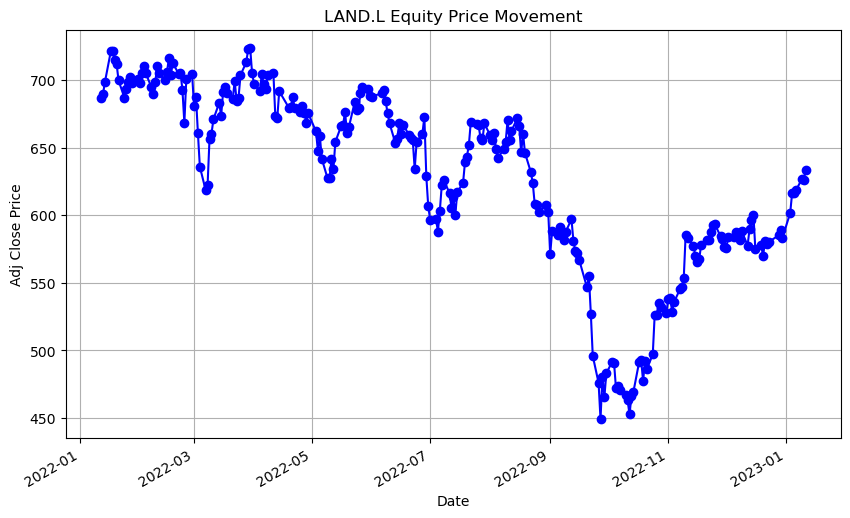

Annualized Average Return: -0.0290
Annualized Standard Deviation: 0.3217


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

# Define the stock symbol and download historical data
stock_symbol = "LAND.L"
start_date = "2022-01-12"
end_date = "2023-01-12"

# Download historical data
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Plot the movement of the equity price
plt.figure(figsize=(10, 6))
df['Adj Close'].plot(marker='o', linestyle='-', color='b')
plt.title(f'{stock_symbol} Equity Price Movement')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.grid(True)
plt.show()

# Calculate daily returns
df['Daily Return'] = df['Adj Close'].pct_change()

# Calculate annualized average return and standard deviation
average_daily_return = df['Daily Return'].mean()
annualized_average_return = (1 + average_daily_return)**252 - 1  # Assuming 252 trading days in a year
annualized_std_deviation = df['Daily Return'].std() * np.sqrt(252)

print(f"Annualized Average Return: {annualized_average_return:.4f}")
print(f"Annualized Standard Deviation: {annualized_std_deviation:.4f}")


# Binomial Tree (European Put Option)

In [11]:
S0 = 685.98              # spot stock price
K = 633.63               # strike
T = 1                    # maturity 
r = 0.035                 # risk free rate 
sig = sd_nr               # standard deviation (volatility)
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 
sd_nr

0.31974490005483747

In [12]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1): #looping forwards, from 1 to N
    for i in range(z):  #looping forwards, from 0 to z-1
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1  # same as z=z+1

In [13]:
print('The binomial tree presenting Land Securities Group Plc price over 3 time steps ', '\n\n', (S))

The binomial tree presenting Land Securities Group Plc price over 3 time steps  

 [[ 685.98        825.05766173  992.33234961 1193.52081406]
 [   0.          570.3462706   685.98        825.05766173]
 [   0.            0.          474.20459545  570.3462706 ]
 [   0.            0.            0.          394.2692535 ]]


In [14]:
print("The up factor u is",(u))

The up factor u is 1.2027430271026394


In [15]:
print("The down factor is",(d))

The down factor is 0.8314327977514537


In [19]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
print("The risk netural probablity is",(p))

The risk netural probablity is 0.48558368623468073


## Option value at each node

In [20]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
print('The option values at each node ', '\n\n', (V))

The option values at each node  

 [[  0.          0.          0.          0.       ]
 [  0.          0.          0.          0.       ]
 [  0.          0.          0.         63.2837294]
 [  0.          0.          0.        239.3607465]]


## Option Value at Earlier Nodes

In [21]:
# for European Option
for j in range(N-1, -1, -1): # Column. looping backwards. From N-1 to 0
    for i in range(j+1):  # Row. looping forwards. From 0 to j
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]) #the theoretical value at each node.
print('The option values at earlier nodes ', '\n\n', (V))

The option values at earlier nodes  

 [[ 55.0190327   16.36017681   0.           0.        ]
 [  0.          92.76619759  32.1765909    0.        ]
 [  0.           0.         152.07600938  63.2837294 ]
 [  0.           0.           0.         239.3607465 ]]


In [22]:
print('European ' + payoff, str( V[0,0]))

European put 55.0190327005685


In [32]:
pip install numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


# Monte Carlo Simulation

In [34]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t])    
        # Price process, see Hilpisch (2015) chapter 1 (equation 1-1) & chapter 3 (equation 3-6)
    return S

In [35]:
T = 1
r = 0.035
sigma = sd_nr
S0 = 685.98
K = 633.63

In [36]:
S2 = mcs_simulation_np(1000)

## Graphical Representation

In [37]:
S2 = np.transpose(S2)
S2

array([[685.98      , 691.01376401, 700.46997663, ..., 505.0064215 ,
        507.23677406, 510.30839229],
       [685.98      , 700.72329731, 705.54289352, ..., 379.03915747,
        381.18799137, 375.19674182],
       [685.98      , 699.21987323, 705.37749649, ..., 325.80855812,
        326.31553101, 324.57662308],
       ...,
       [685.98      , 678.14360205, 676.39465628, ..., 898.11387347,
        896.48971841, 892.38726123],
       [685.98      , 682.7376461 , 681.4450532 , ..., 619.70210171,
        624.63018942, 627.68621428],
       [685.98      , 678.26954444, 672.9951361 , ..., 843.18279267,
        828.72508758, 823.66923015]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

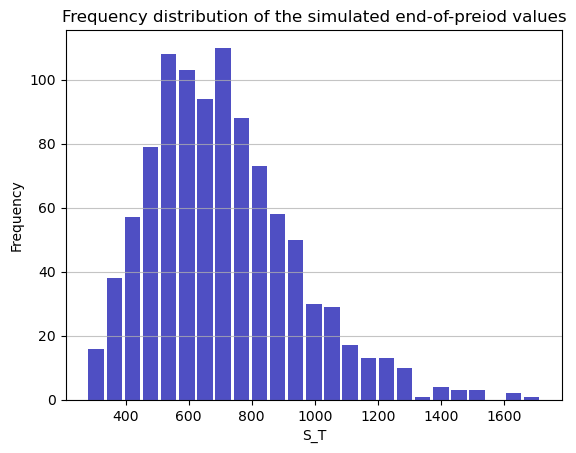

In [38]:
n, bins, patches = plt.hist(x=S2[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [40]:
put = np.mean(np.maximum(K - S2[:,-1],0))
print('Monte Carlo Simulation Option price - European put', str(put))

Monte Carlo Simulation Option price - European put 53.37694288671081


# Greeks

## Delta 

Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S. 

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

In [44]:
def delta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  si.norm.cdf(d1, 0.0, 1.0)-1
    
    return delta

In [46]:
delta(S0, K, T, r, sigma, 'put')

-0.30236680823884

In [47]:
S11 = np.linspace(50,300,22)
Delta_Put = np.zeros((len(S11),1))
for i in range(len(S11)):
    Delta_Put [i] = delta(S11[i], K, T, r, sigma, 'put')

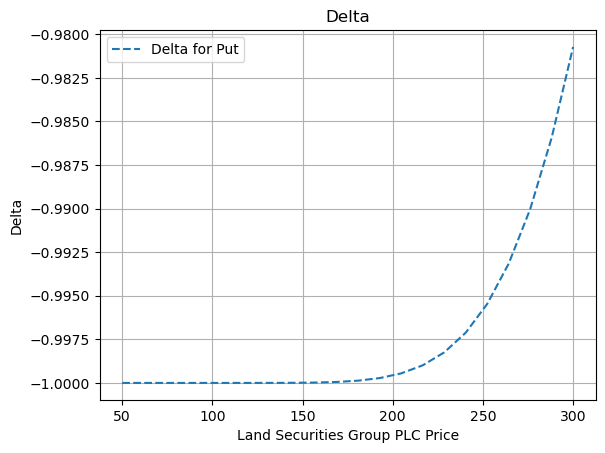

In [49]:
fig = plt.figure()

plt.plot(S11, Delta_Put, '--')
plt.grid()
plt.xlabel('Land Securities Group PLC Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

In [51]:
S12 = np.linspace(50, 300, 22)
T12 = np.linspace(0.5, 2, 51)
Delta1 = np.zeros((len(T12),len(S12)))
for j in range(len(S12)):
    for i in range(len(T12)):
        Delta1[i,j] = delta(S12[j], K, T12[i], r, sigma, 'put')

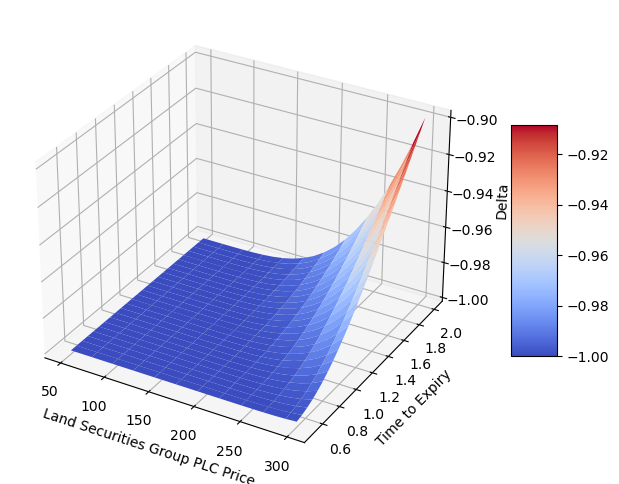

In [52]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
S12, T12 = np.meshgrid(S12, T12)
surf = ax.plot_surface(S12, T12, Delta1, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Land Securities Group PLC Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Gamma

Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price. 

In [53]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [54]:
gamma(S0, K, T, r, 0, sigma, 'put')

0.0015908085176815079

In [55]:
S21 = np.linspace(60,300,11)
Gamma1 = np.zeros((len(S21),1))
for i in range(len(S21)):
    Gamma1[i] = gamma(S21[i], K, T, r, 0, sigma, 'put')

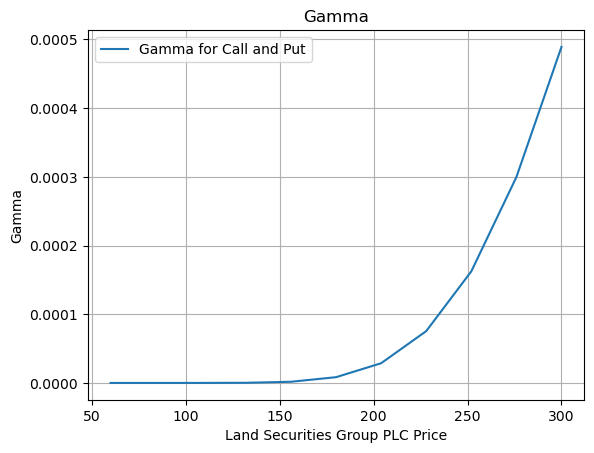

In [57]:
fig = plt.figure()
plt.plot(S21, Gamma1, '-')
plt.grid()
plt.xlabel('Land Securities Group PLC Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [58]:
S22 = np.linspace(50, 300, 22)
T22 = np.linspace(0.5, 2, 51)
Gamma1 = np.zeros((len(T22),len(S22)))
for j in range(len(S22)):
    for i in range(len(T22)):
        Gamma1[i,j] = gamma(S22[j], K, T22[i], r, 0, sigma, 'put')

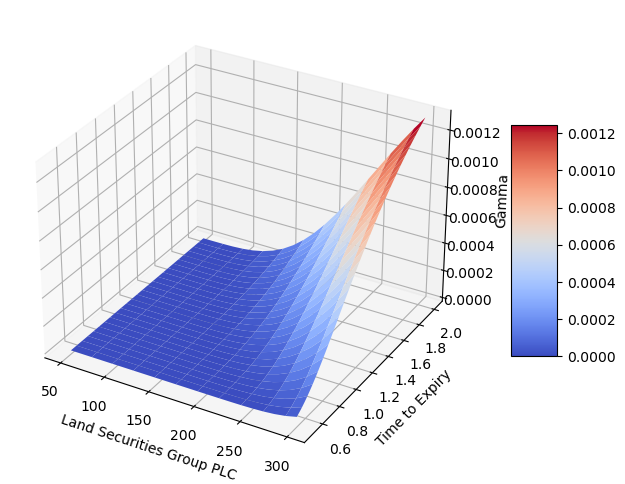

In [59]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
S22, T22 = np.meshgrid(S22, T22)
surf = ax.plot_surface(S22, T22, Gamma1, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Land Securities Group PLC')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Theta

Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".

In [60]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [61]:
theta(S0, K, T, r, 0, sigma, 'put')

47.294211024606334

In [62]:
T41 = np.linspace(60,300,11)
Theta_Call = np.zeros((len(T41),1))
Theta_Put = np.zeros((len(T41),1))
for i in range(len(T41)):
    Theta_Put [i] = theta(S0, K, T41[i], r, 0, sigma, 'put')

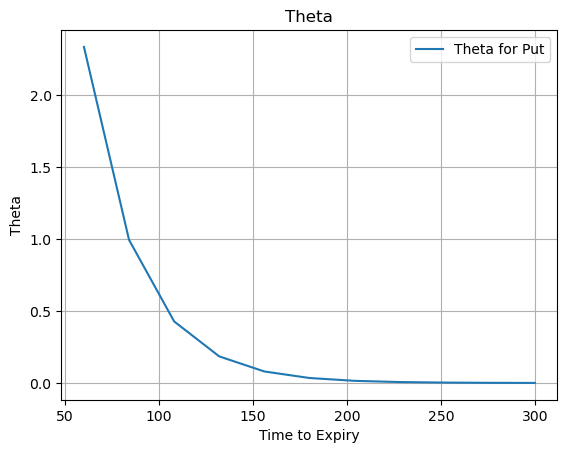

In [63]:
fig = plt.figure()
plt.plot(T41, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

In [64]:
S42 = np.linspace(60, 300, 22)
T42 = np.linspace(1/52, 3/52, 51)
Theta1 = np.zeros((len(T42),len(S42)))
for j in range(len(S42)):
    for i in range(len(T42)):
        Theta1[i,j] = theta(S42[j], K, T42[i], r, 0, sigma, 'put')

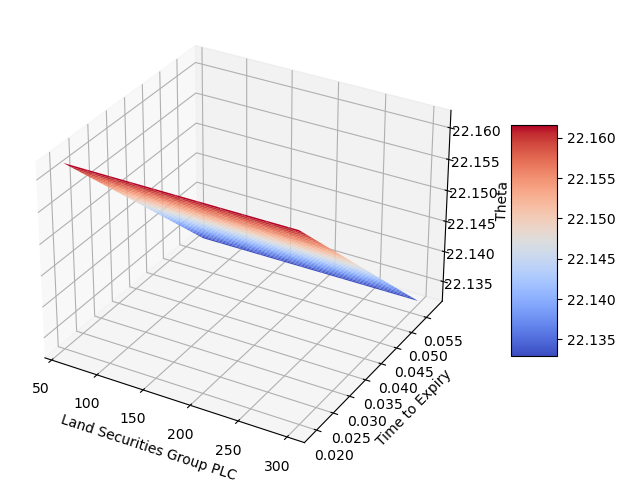

In [65]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
S42, T42 = np.meshgrid(S42, T42)
surf = ax.plot_surface(S42, T42, Theta1, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Land Securities Group PLC')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Rho

Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term). 

In [66]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [67]:
rho(S0, K, T, r, 0, sigma, 'put')

-257.93628660293507

In [68]:
r1 = np.linspace(0.01,0.1,11)
Rho_Call = np.zeros((len(r1),1))
Rho_Put = np.zeros((len(r1),1))
for i in range(len(r1)):
    Rho_Put [i] = rho(S0, K, T, r1[i], 0, sigma, 'put')

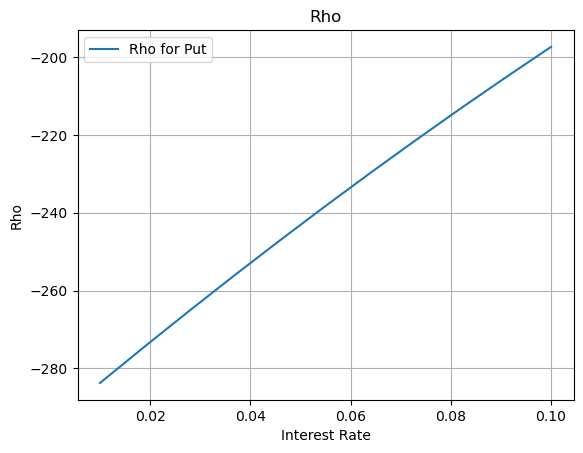

In [69]:
fig = plt.figure()
plt.plot(r1, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend([ 'Rho for Put'])

In [70]:
S53 = np.linspace(60, 300, 51)
T53 = np.linspace(0.5, 2, 51)
Rho3 = np.zeros((len(T53),len(S53)))
for j in range(len(S53)):
    for i in range(len(T53)):
        Rho3[i,j] = rho(S53[j], K, T53[i], r, 0, sigma, 'put')

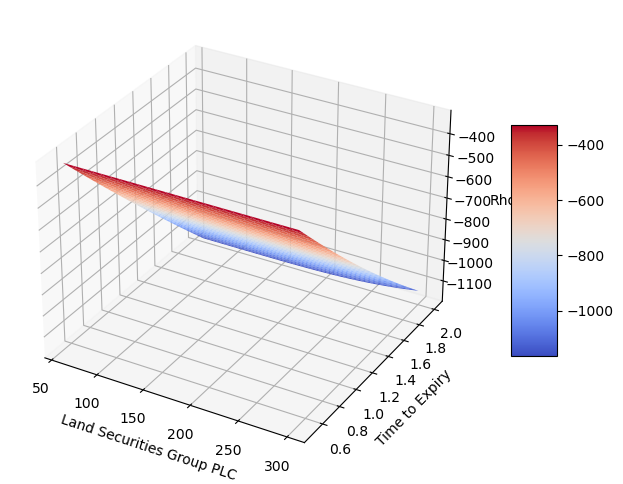

In [71]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
S53, T53 = np.meshgrid(S53, T53)
surf = ax.plot_surface(S53, T53, Rho3, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Land Securities Group PLC')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Vega 

Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [72]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [73]:
vega(S0, K, T, r, 0, sigma, 'put')

239.35606783370596

In [74]:
volvega = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(volvega),1))
for i in range(len(volvega)):
    Vega [i] = vega(S0, K, T, r, 0, volvega[i], 'put')

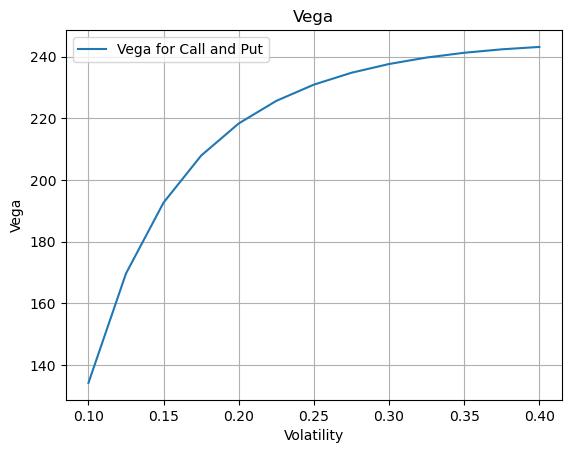

In [75]:
fig = plt.figure()
plt.plot(volvega, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

In [76]:
S63 = np.linspace(50, 300, 51)
T63 = np.linspace(0.5, 2, 51)
Vega2 = np.zeros((len(T63),len(S63)))
for j in range(len(S63)):
    for i in range(len(T63)):
        Vega2[i,j] = vega(S63[j], K, T63[i] , r, 0, sigma, 'put')

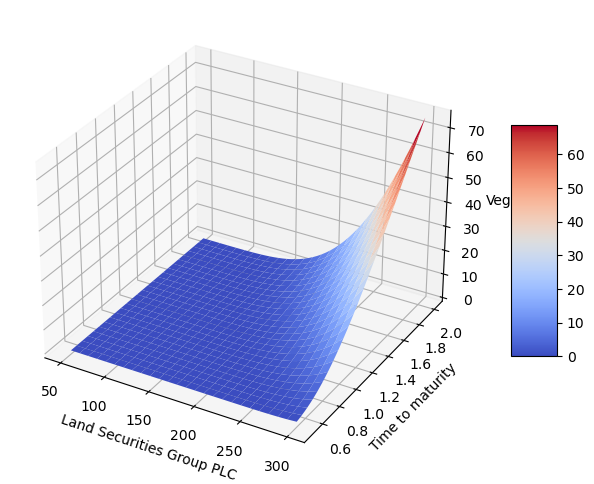

In [77]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
S63, T63 = np.meshgrid(S63,T63)
surf = ax.plot_surface(S63, T63, Vega2, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Land Securities Group PLC')
ax.set_ylabel('Time to maturity')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);